MARKET BASKET ANALYSIS

In [4]:
#Step 1- Importing Required Libraries
!pip install apyori
!pip install mlxtend 
!pip install seaborn 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from apyori import apriori
#transactions = globals()['transactions']
import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting

^C



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Step 2-Import data
import pandas as pd
df= pd.read_csv(r"C:\Users\USER\Desktop\FLiT_Project 1\MBA- Groceries_dataset.csv")
# Display the data
df.head()
print(df)

       Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]


In [ ]:
df.shape
(38765, 3)
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
# Checking data type information for validation purposes (No Null values should be present)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
#Step 3 data preprocessing
# Type-Conversion from Object to Dateime
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [ ]:
#Step - 4 : Performing Exploratory Data Analysis
#Step - 4.1 : Top 10 Sold Items



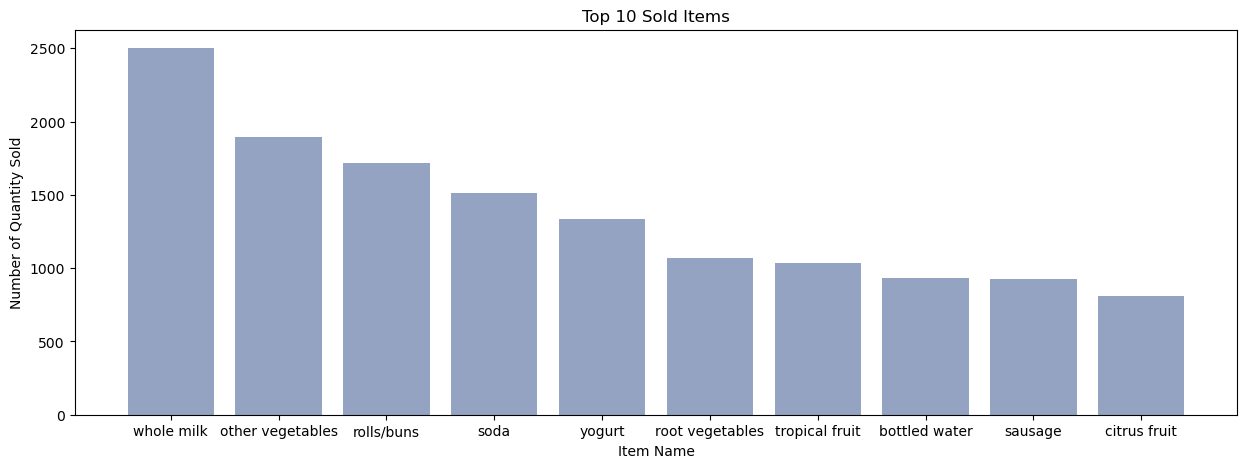

In [ ]:
## Creating distribution of Item Sold

Item_distr = df.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

# Declaring variables

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

# Defining Figure Size

plt.figure(figsize=(15,5))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

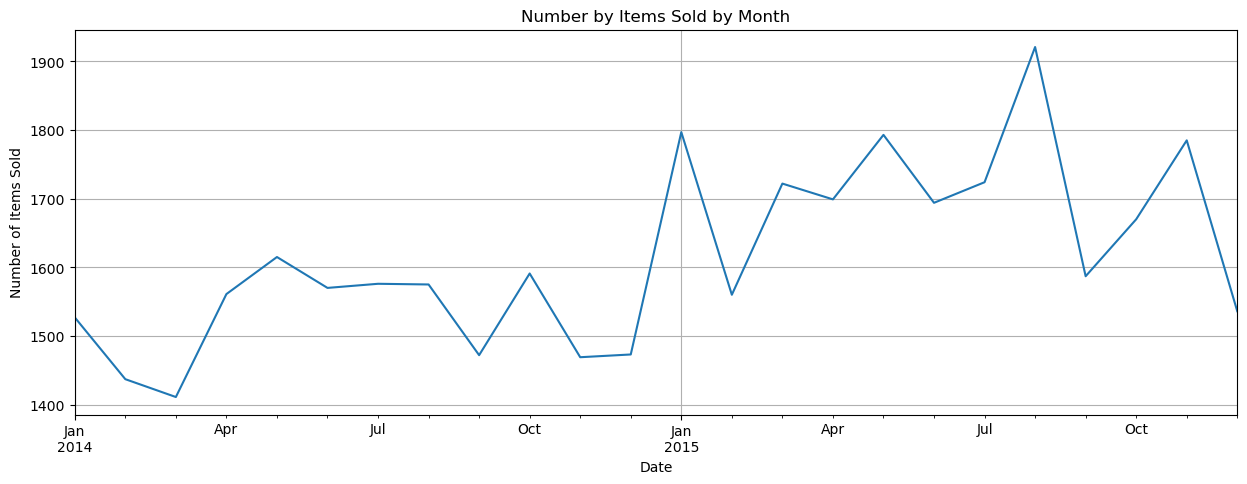

In [ ]:
#Step - 4.2 : Month-Year Sales
## Setting date as index for plotting purpose
df_date=df.set_index(['Date'])


df_date.resample("M")['itemDescription'].count().plot(figsize = (15,5), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

Text(0, 0.5, 'Qty')

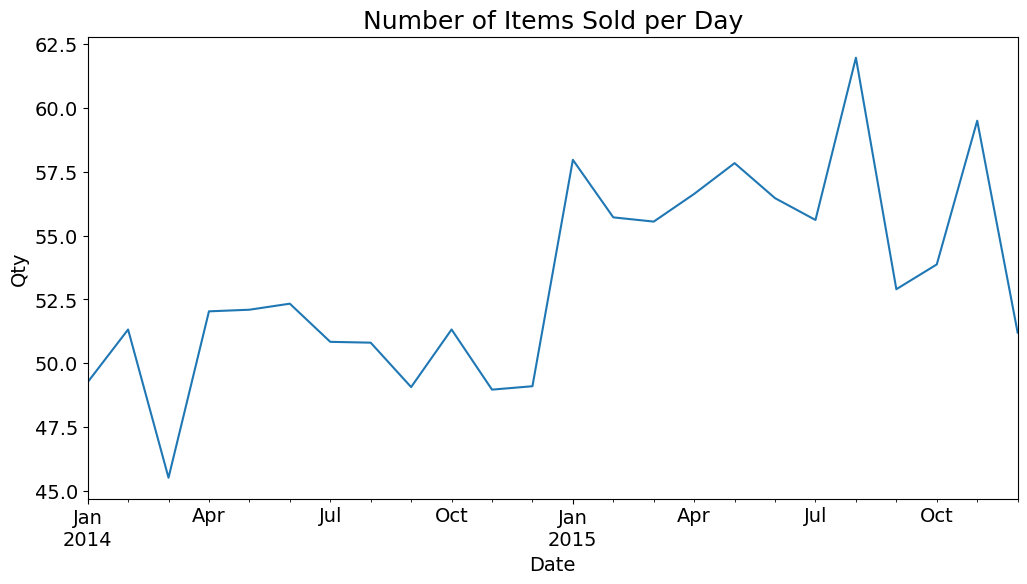

In [ ]:
# average number of items sold per day

import matplotlib.pyplot as plt
df[['Date','itemDescription']].groupby('Date').count()\
.resample('M').mean()\
.plot(figsize=(12,6), legend=False, fontsize=14)
plt.title('Number of Items Sold per Day', fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Qty', fontsize=14)

In [ ]:
#Average number of items per shopping
item_qty = df[['Member_number', 'Date','itemDescription']]\
.groupby(['Member_number','Date']).count().reset_index()
item_qty.head()

,Member_number,Date,itemDescription
0,1000,2014-06-24,3
1,1000,2015-03-15,4
2,1000,2015-05-27,2
3,1000,2015-07-24,2
4,1000,2015-11-25,2


Text(0.5, 1.0, 'Histogram of Item Quantities per Shopping')

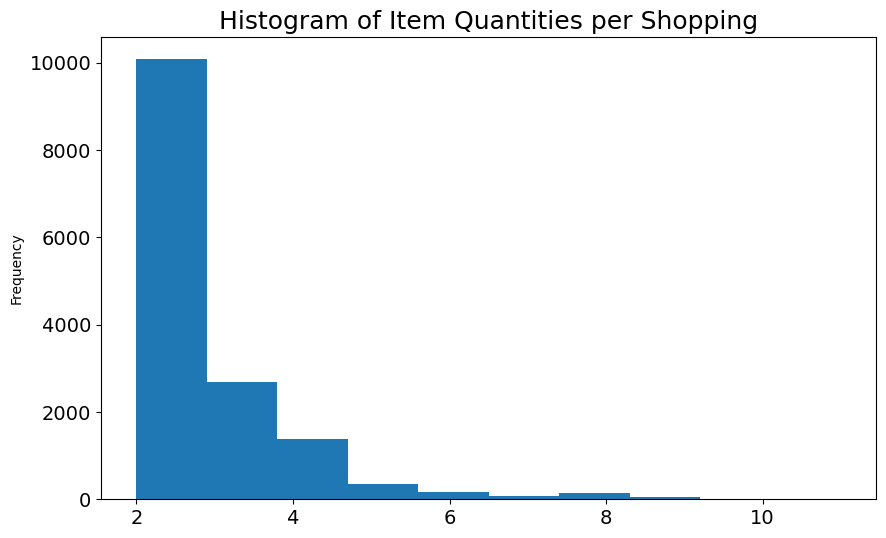

In [ ]:
#distribution of the number of items per shopping
item_qty = df[['Member_number', 'Date','itemDescription']]\
.groupby(['Member_number','Date']).count().reset_index()
item_qty.head()
item_qty.itemDescription.mean()
item_qty.itemDescription.plot(figsize=(10,6), kind='hist',
                              legend=False, fontsize=14)
plt.title('Histogram of Item Quantities per Shopping', fontsize=18)


In [ ]:
item_qty.itemDescription.mean()

2.590723785337165

In [ ]:
# Items that are frequently purchased together
items = df.groupby(['Member_number', 'Date'])\
.agg({'itemDescription': lambda x: x.ravel().tolist()}).reset_index()
items.head()

,Member_number,Date,itemDescription
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned beer, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"


In [ ]:
#combinations of items in each row in “itemDescription” column
import itertools
list(itertools.combinations(items.itemDescription[0], 2))

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('pastry', 'salty snack')]

In [ ]:
combinations_list = []
for row in items.itemDescription:
    combinations = list(itertools.combinations(row, 2))
    combinations_list.append(combinations)

In [ ]:
combinations_list [:2]

[[('whole milk', 'pastry'),
  ('whole milk', 'salty snack'),
  ('pastry', 'salty snack')],
 [('sausage', 'whole milk'),
  ('sausage', 'semi-finished bread'),
  ('sausage', 'yogurt'),
  ('whole milk', 'semi-finished bread'),
  ('whole milk', 'yogurt'),
  ('semi-finished bread', 'yogurt')]]

In [ ]:
combination_counts = pd.Series(combinations_list).explode().reset_index(drop=True)

In [ ]:
combination_counts [:5]

0              (whole milk, pastry)
1         (whole milk, salty snack)
2             (pastry, salty snack)
3             (sausage, whole milk)
4    (sausage, semi-finished bread)
dtype: object

In [ ]:
combination_counts.value_counts() [:10]

In [ ]:
#count the number of whole milks at each shopping
whole_milk = df[df.itemDescription == 'whole milk']\
.groupby(['Member_number','Date']).count()\
.sort_values(by='itemDescription', ascending=False).reset_index()
whole_milk.head()

,Member_number,Date,itemDescription
0,1994,2015-03-11,4
1,4843,2015-05-13,3
2,2736,2015-03-02,3
3,1370,2015-06-28,3
4,3518,2014-02-08,3


In [ ]:
#Step - 5 : Basket Analysis using Apriori

#Step - 5.1 : Data Preparation
## Selecting only required variables for modelling
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False)

# Removing white spaces if any
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [ ]:
#Step - 5.2 : Create Transaction list

## Combing all the items in list format for each customer

transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]


In [ ]:
#Step - 5.3 : Train Model
## Model Creation
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2)

## Storing results in list format for better visualisation
results = list(rules)
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [ ]:
#Step - 6 : Result Customization

## Creating user-defined function for arranging the results obtained from model into readable format

def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

## Showing best possible scenarios
resultsinDataFrame.nlargest(n=10, columns="Lift")

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,potato products,beef,0.002565,0.454545,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
4,flour,mayonnaise,0.002309,0.063380,3.338599
6,sparkling wine,waffles,0.002565,0.217391,3.150154
5,rice,napkins,0.003079,0.244898,3.011395
3,meat spreads,domestic eggs,0.003592,0.400000,3.004239


 Left Hand Side (LHS):
 It represents the items that are observed or known to occur together with other items.
Right Hand Side (RHS):
It represents the items that are expected to co-occur with the items in the LHS.
Support:

Support is a measure of how frequently a particular itemset or association rule appears in the dataset. It is calculated as the proportion of transactions that contain both the LHS and RHS of the rule. A higher support value indicates that the association is more common in the dataset.
Confidence:
Confidence measures the reliability or strength of an association rule. It is calculated as the proportion of transactions containing the LHS that also contain the RHS. In other words, it represents the conditional probability of the RHS given the LHS. Higher confidence values indicate stronger associations between items.
Lift:
Lift is a measure of how much more likely the RHS is to occur given the presence of the LHS compared to its expected occurrence by chance. It is calculated as the ratio of the observed support of the association rule to the expected support if the items in the LHS and RHS were independent. Lift values greater than 1 indicate that the occurrence of the items is positively correlated, while values less than 1 indicate negative correlation or independence.